In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [3]:
df= pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\UNIFIED MENTOR PRIVATE LIMITED\Project 2\Excel\Electric Vehicle Sales by State in India.csv")

In [5]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


# Information of the type of data in seach column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [10]:
df['Year'] = df['Year'].astype(int)

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [13]:
categorical_columns = ['Month_Name', 'State', 'Vehicle_Class','Vehicle_Category', 'Vehicle_Type']
df[categorical_columns] =df[categorical_columns].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


# Finding out the number of null values

In [15]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

# Descriptive Statistics of the dataset

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,96845.0,2018.622768,2014.0,2016.0,2019.0,2021.0,2024.0,2.895581
Date,96845,2019-01-28 11:00:33.641385728,2014-01-01 00:00:00,2016-08-01 00:00:00,2019-02-01 00:00:00,2021-09-01 00:00:00,2024-01-01 00:00:00,NaN
EV_Sales_Quantity,96845.0,37.108896,0.0,0.0,0.0,0.0,20584.0,431.566675


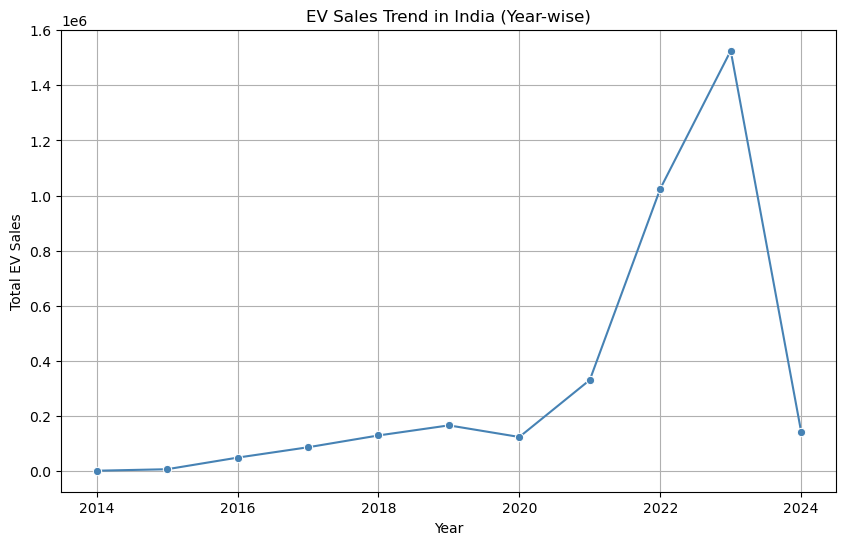

In [17]:
if 'Year' in df.columns:
    year_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
    plt.figure(figsize=(10,6))
    sns.lineplot(data=year_sales, x='Year', y='EV_Sales_Quantity', marker='o', color='steelblue')
    plt.title("EV Sales Trend in India (Year-wise)")
    plt.xlabel("Year")
    plt.ylabel("Total EV Sales")
    plt.grid(True)
    plt.show()


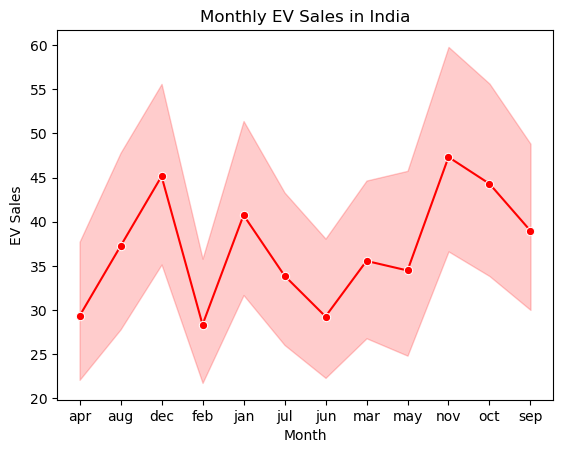

In [26]:
plt.title('Monthly EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales') 
plt.show()

In [18]:
total_sales = df['EV_Sales_Quantity'].sum()
print(f"\n⚡ Total EV Sales in India: {total_sales:,}")


⚡ Total EV Sales in India: 3,593,811.0


# Top and Bottom 5 States

In [19]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

print("\n🏆 Top 5 States by EV Sales:")
print(state_sales.head(5))

print("\n🔻 Bottom 5 States by EV Sales:")
print(state_sales.tail(5))



🏆 Top 5 States by EV Sales:
State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Name: EV_Sales_Quantity, dtype: float64

🔻 Bottom 5 States by EV Sales:
State
Andaman & Nicobar Island    202.0
Ladakh                       88.0
Nagaland                     52.0
Arunachal Pradesh            40.0
Sikkim                        4.0
Name: EV_Sales_Quantity, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_31660\2410967002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)


# Top 5 States by EV Sales

C:\Users\DELL\AppData\Local\Temp\ipykernel_31660\1540155366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)


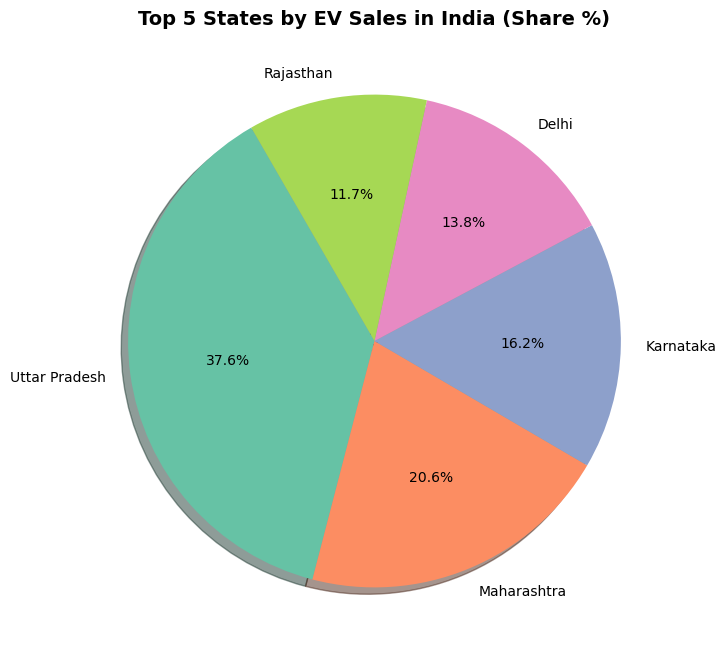

In [34]:
# Group data by State and get total sales
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Select top 5 states
top5_states = state_sales.head(5)

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(top5_states,labels=top5_states.index,autopct="%.1f%%",startangle=120,shadow=True,colors=sns.color_palette("Set2", 5))
plt.title("Top 5 States by EV Sales in India (Share %)", fontsize=14, fontweight='bold')
plt.show()


# State-Wise Analysis of EV Sales

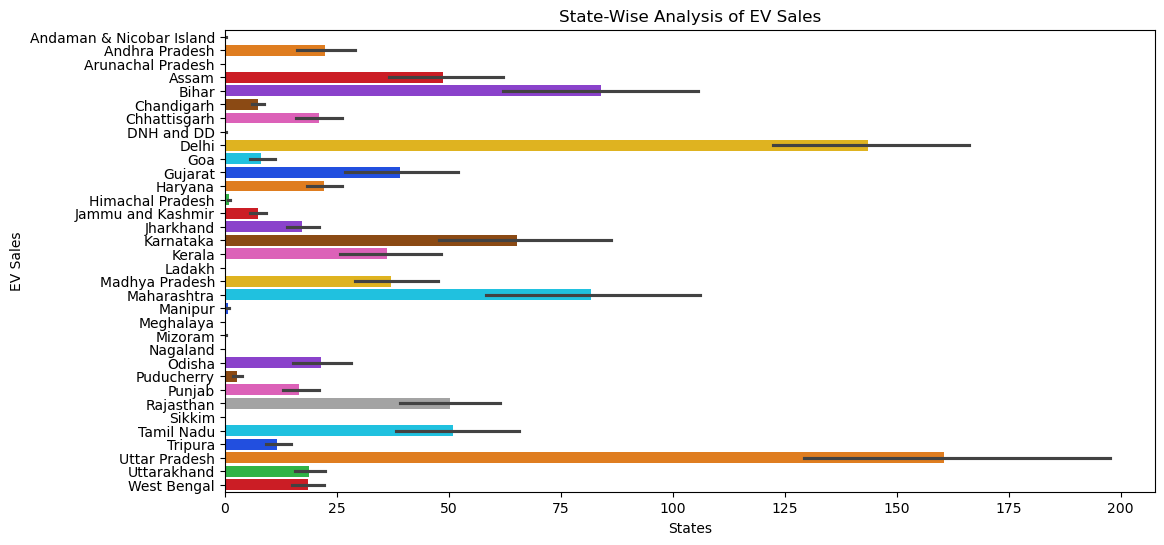

In [27]:
plt.figure(figsize=(12,6))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State', x='EV_Sales_Quantity', data=df,hue='State', palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales')
plt.show()

# Analysis by Vehicle Category

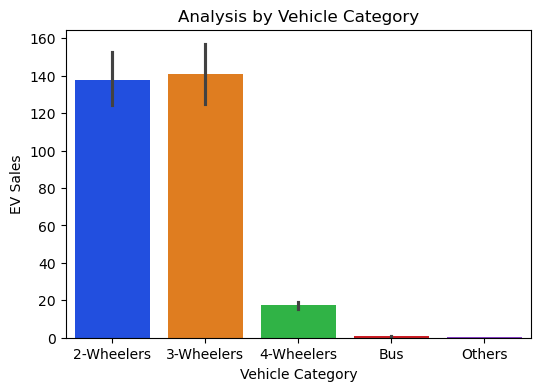

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category',y='EV_Sales_Quantity',data=df, hue='Vehicle_Category',palette='bright')
plt.title('Analysis by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales')
plt.show()


# Analysis by Vehicle Type

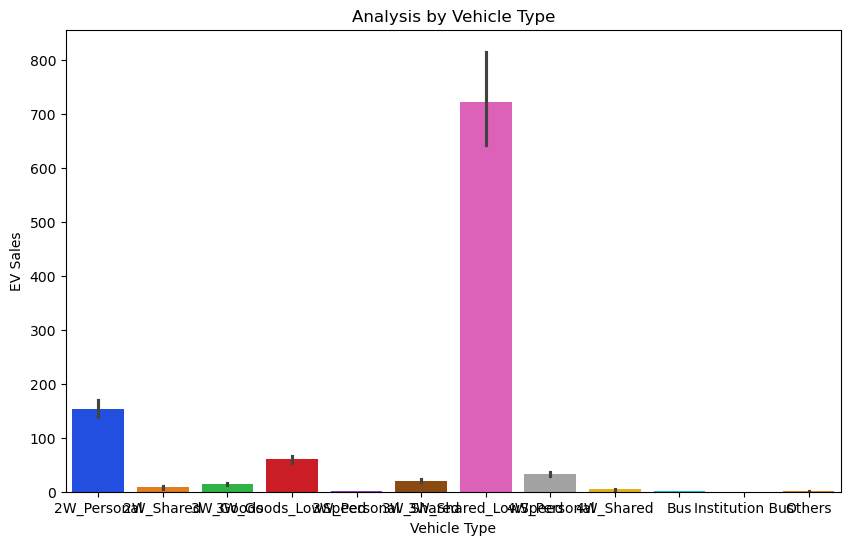

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Vehicle_Type', y='EV_Sales_Quantity', hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.show()


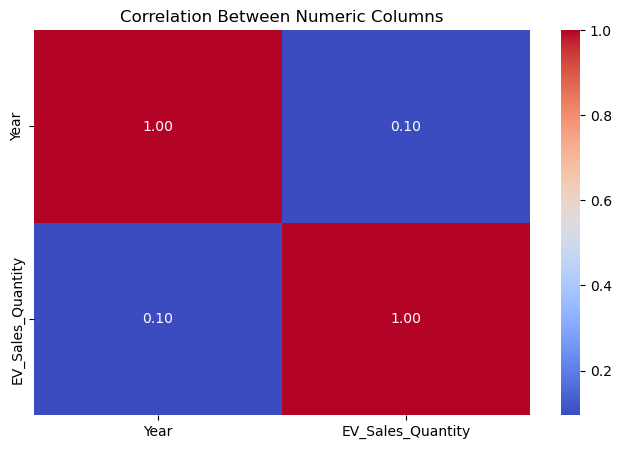

In [33]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Columns")
plt.show()